In [1]:
!unzip -q /kaggle/input/morph-cacd-agedb-fgnet-datasets-processing/_output_.zip -d /kaggle/working

In [2]:
import pandas as pd

morph_cacd_agedb_fgnet = pd.read_csv("/kaggle/working/morph_cacd_agedb_fgnet.csv")
morph_cacd_agedb_fgnet

/tmp/ipykernel_17/3201144466.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  morph_cacd_agedb_fgnet = pd.read_csv("/kaggle/working/morph_cacd_agedb_fgnet.csv")


,global_identity,identity,age,gender,aligned_path,dataset
0,AgeDB_BurtLancaster,BurtLancaster,56,m,/kaggle/working/AgeDB_processed/BurtLancaster/...,AgeDB
1,AgeDB_GordonThomson,GordonThomson,64,m,/kaggle/working/AgeDB_processed/GordonThomson/...,AgeDB
2,AgeDB_angelamerkel,angelamerkel,20,f,/kaggle/working/AgeDB_processed/angelamerkel/a...,AgeDB
3,AgeDB_LawrenceTierney,LawrenceTierney,34,m,/kaggle/working/AgeDB_processed/LawrenceTierne...,AgeDB
4,AgeDB_JamesWoods,JamesWoods,54,m,/kaggle/working/AgeDB_processed/JamesWoods/Jam...,AgeDB
...,...,...,...,...,...,...
174046,MORPH_95104,95104.0,39,f,/kaggle/working/MORPH_processed/95104/95104_39...,MORPH
174047,MORPH_96151,96151.0,41,m,/kaggle/working/MORPH_processed/96151/96151_41...,MORPH
174048,MORPH_98189,98189.0,49,m,/kaggle/working/MORPH_processed/98189/98189_49...,MORPH
174049,MORPH_9893,9893.0,55,m,/kaggle/working/MORPH_processed/9893/9893_55_m...,MORPH


In [3]:

# Drop identity column
morph_cacd_agedb_fgnet = morph_cacd_agedb_fgnet.drop(columns=["identity"])

# Show dtypes
print(morph_cacd_agedb_fgnet.dtypes)

global_identity    object
age                 int64
gender             object
aligned_path       object
dataset            object
dtype: object


In [4]:
morph_cacd_agedb_fgnet = morph_cacd_agedb_fgnet.rename(columns={
    "global_identity": "identity",
    "aligned_path": "filepath"
})

In [5]:
morph_cacd_agedb_fgnet.tail()

,identity,age,gender,filepath,dataset
174046,MORPH_95104,39,f,/kaggle/working/MORPH_processed/95104/95104_39...,MORPH
174047,MORPH_96151,41,m,/kaggle/working/MORPH_processed/96151/96151_41...,MORPH
174048,MORPH_98189,49,m,/kaggle/working/MORPH_processed/98189/98189_49...,MORPH
174049,MORPH_9893,55,m,/kaggle/working/MORPH_processed/9893/9893_55_m...,MORPH
174050,MORPH_9893,59,m,/kaggle/working/MORPH_processed/9893/9893_59_m...,MORPH


In [6]:
import os 

morph_cacd_agedb_fgnet["filename"] = morph_cacd_agedb_fgnet["filepath"].apply(lambda x: os.path.basename(str(x)))

In [7]:
morph_cacd_agedb_fgnet = morph_cacd_agedb_fgnet[
    ["identity", "age", "gender", "filename", "filepath", "dataset"]
]

In [8]:
morph_cacd_agedb_fgnet.head()

,identity,age,gender,filename,filepath,dataset
0,AgeDB_BurtLancaster,56,m,BurtLancaster_56_m_000000.jpg,/kaggle/working/AgeDB_processed/BurtLancaster/...,AgeDB
1,AgeDB_GordonThomson,64,m,GordonThomson_64_m_000001.jpg,/kaggle/working/AgeDB_processed/GordonThomson/...,AgeDB
2,AgeDB_angelamerkel,20,f,angelamerkel_20_f_000002.jpg,/kaggle/working/AgeDB_processed/angelamerkel/a...,AgeDB
3,AgeDB_LawrenceTierney,34,m,LawrenceTierney_34_m_000003.jpg,/kaggle/working/AgeDB_processed/LawrenceTierne...,AgeDB
4,AgeDB_JamesWoods,54,m,JamesWoods_54_m_000004.jpg,/kaggle/working/AgeDB_processed/JamesWoods/Jam...,AgeDB


In [9]:
 morph_cacd_agedb_fgnet.dtypes

identity    object
age          int64
gender      object
filename    object
filepath    object
dataset     object
dtype: object

In [10]:
morph_cacd_agedb_fgnet.tail()

,identity,age,gender,filename,filepath,dataset
174046,MORPH_95104,39,f,95104_39_f_049977.jpg,/kaggle/working/MORPH_processed/95104/95104_39...,MORPH
174047,MORPH_96151,41,m,96151_41_m_049986.jpg,/kaggle/working/MORPH_processed/96151/96151_41...,MORPH
174048,MORPH_98189,49,m,98189_49_m_050007.jpg,/kaggle/working/MORPH_processed/98189/98189_49...,MORPH
174049,MORPH_9893,55,m,9893_55_m_050009.jpg,/kaggle/working/MORPH_processed/9893/9893_55_m...,MORPH
174050,MORPH_9893,59,m,9893_59_m_050010.jpg,/kaggle/working/MORPH_processed/9893/9893_59_m...,MORPH


In [11]:
# ============================================================
identity_counts = morph_cacd_agedb_fgnet['identity'].value_counts()
print(f"Identities with multiple ages: {(identity_counts > 1).sum()}")
print(f"Average images per identity: {identity_counts.mean():.2f}")
print(f"Max images per identity: {identity_counts.max()}")
print(f"\n len of identity_counts more than 1 : {len(identity_counts)}")
print("\nTop 10 identities by image count:")
identity_counts.head(10)

Identities with multiple ages: 3237
Average images per identity: 53.77
Max images per identity: 135

 len of identity_counts more than 1 : 3237

Top 10 identities by image count:


identity
CACD_1852    135
CACD_1319    133
CACD_361     128
CACD_1353    127
CACD_858     125
CACD_1768    125
CACD_1952    124
CACD_1907    124
CACD_1951    123
CACD_1059    122
Name: count, dtype: int64

In [12]:
output_path = "/kaggle/working/morph_cacd_agedb_fgnet_updated.csv"

morph_cacd_agedb_fgnet.to_csv(
    output_path,
    index=False
)

print(f"Saved to: {output_path}")


Saved to: /kaggle/working/morph_cacd_agedb_fgnet_updated.csv


In [13]:
morph_cacd_agedb_fgnet = pd.read_csv("/kaggle/working/morph_cacd_agedb_fgnet_updated.csv")
morph_cacd_agedb_fgnet.head()

,identity,age,gender,filename,filepath,dataset
0,AgeDB_BurtLancaster,56,m,BurtLancaster_56_m_000000.jpg,/kaggle/working/AgeDB_processed/BurtLancaster/...,AgeDB
1,AgeDB_GordonThomson,64,m,GordonThomson_64_m_000001.jpg,/kaggle/working/AgeDB_processed/GordonThomson/...,AgeDB
2,AgeDB_angelamerkel,20,f,angelamerkel_20_f_000002.jpg,/kaggle/working/AgeDB_processed/angelamerkel/a...,AgeDB
3,AgeDB_LawrenceTierney,34,m,LawrenceTierney_34_m_000003.jpg,/kaggle/working/AgeDB_processed/LawrenceTierne...,AgeDB
4,AgeDB_JamesWoods,54,m,JamesWoods_54_m_000004.jpg,/kaggle/working/AgeDB_processed/JamesWoods/Jam...,AgeDB


In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import numpy as np

def plot_n_images_random(df, n=12):
    # Keep only valid filepaths
    df_valid = df[df["filepath"].apply(
        lambda x: isinstance(x, str) and os.path.exists(x)
    )].reset_index(drop=True)

    # Random sampling every call
    sampled = df_valid.sample(n=min(n, len(df_valid)))

    cols = 4                       # fixed
    rows = (len(sampled) + cols - 1) // cols

    plt.figure(figsize=(cols * 3, rows * 3))

    for i, (_, row) in enumerate(sampled.iterrows(), 1):
        img = Image.open(row["filepath"]).convert("RGB")

        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(
            f"{row['dataset']} | {row['age']}y | {row['gender']}",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


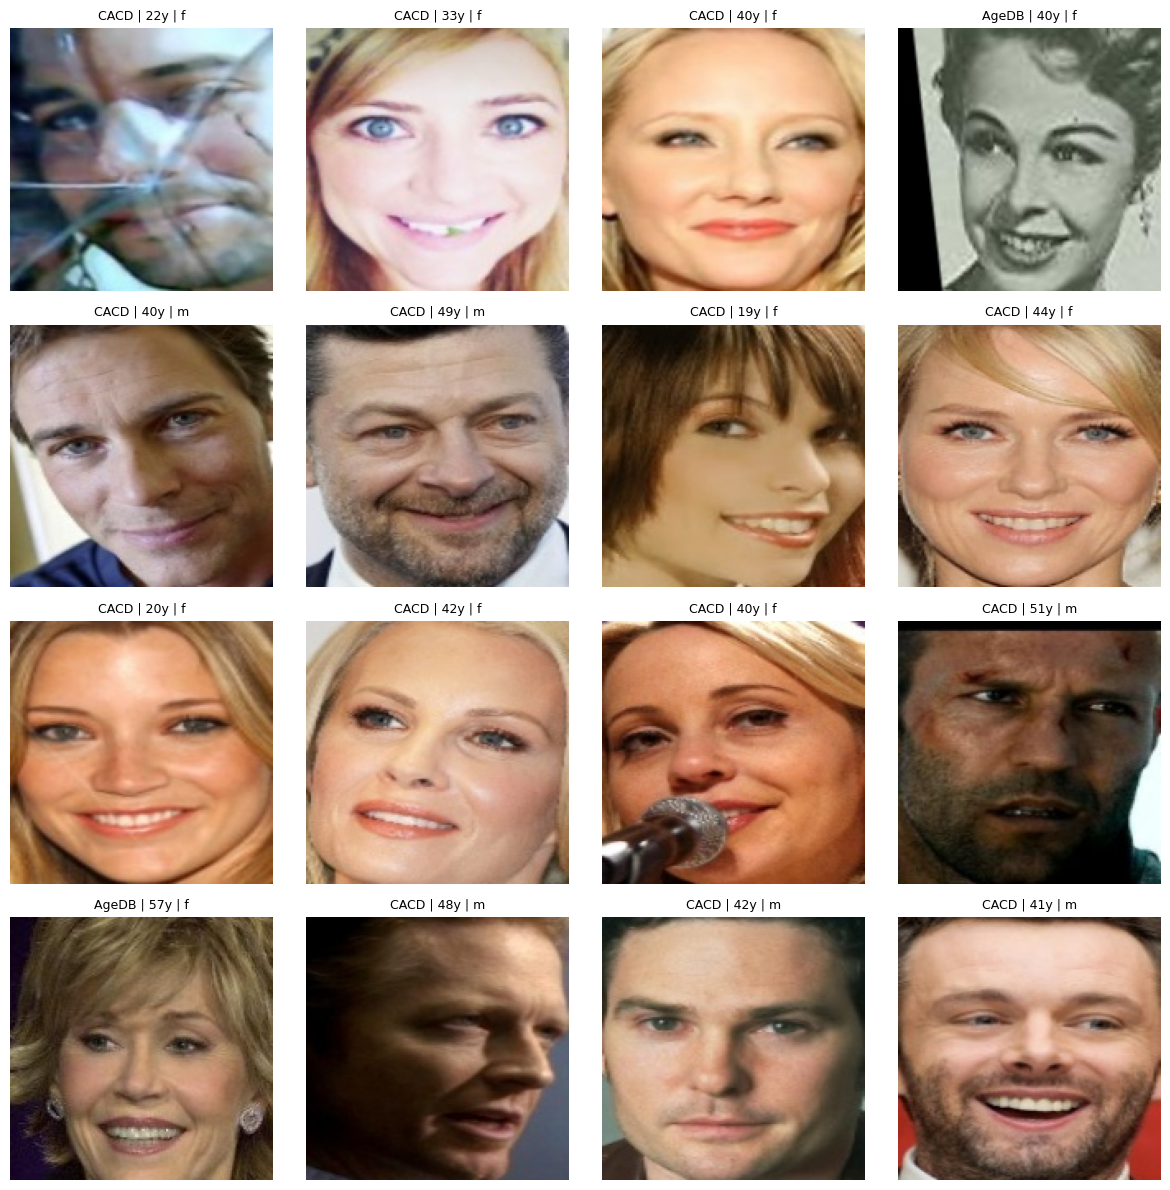

In [15]:
plot_n_images_random(morph_cacd_agedb_fgnet, n=16)

# Create pairs

In [16]:
import pandas as pd
import numpy as np
from itertools import combinations
import random
from pathlib import Path
import cv2
from tqdm import tqdm  # Add this import for progress bars

# -------------------- Configuration --------------------
CSV_PATH = '/kaggle/working/morph_cacd_agedb_fgnet_updated.csv'
OUTPUT_DIR = '/kaggle/working/train_data'
TRAIN_VAL_SPLIT = 0.8  # 80% train, 20% validation
MAX_POS_PAIRS_PER_IDENTITY = 50  # Limit for identities with many images
BALANCE_RATIO = 1.0  # 1:1 ratio of positive to negative pairs

# -------------------- Quality Assessment Functions --------------------

def estimate_image_quality(image_path):
    """
    Estimate image quality score [0, 1] as approximation of SER-FIQ.
    Combines multiple quality metrics: sharpness, brightness, resolution.
    
    Higher score = better quality
    """
    try:
        # Load image
        img = cv2.imread(str(image_path))
        if img is None:
            return 0.5  # Default for unreadable images
        
        # Convert to grayscale for some metrics
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # 1. Sharpness (Laplacian variance) - normalized
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        sharpness_score = min(laplacian_var / 1000.0, 1.0)  # Normalize to [0,1]
        
        # 2. Brightness (mean intensity) - penalize too dark or too bright
        brightness = gray.mean() / 255.0
        brightness_score = 1.0 - abs(brightness - 0.5) * 2  # Optimal at 0.5
        
        # 3. Resolution score
        height, width = img.shape[:2]
        resolution = height * width
        resolution_score = min(resolution / (512 * 512), 1.0)  # Normalize
        
        # 4. Contrast (standard deviation)
        contrast = gray.std() / 128.0  # Normalize
        contrast_score = min(contrast, 1.0)
        
        # Weighted combination
        quality_score = (
            0.4 * sharpness_score +
            0.2 * brightness_score +
            0.2 * resolution_score +
            0.2 * contrast_score
        )
        
        return np.clip(quality_score, 0.0, 1.0)
    
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return 0.5  # Default fallback


def compute_quality_scores(df):
    """
    Compute quality scores for all images in dataframe with progress bar.
    Returns updated dataframe with 'quality_score' column.
    """
    print("Computing quality scores for all images...")
    quality_scores = []
    
    # Use tqdm for progress bar
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Quality scores"):
        quality = estimate_image_quality(row['filepath'])
        quality_scores.append(quality)
    
    df['quality_score'] = quality_scores
    print(f"✓ Quality scores computed. Mean: {np.mean(quality_scores):.3f}, Std: {np.std(quality_scores):.3f}")
    return df


def partition_by_quality(df):
    """
    Partition images into Easy/Medium/Hard bins based on quality scores.
    Uses mean-standard deviation approach from paper.
    
    Returns dataframe with 'quality_bin' column (0=Hard, 1=Medium, 2=Easy)
    """
    quality_scores = df['quality_score'].values
    
    # Step 1: Calculate initial threshold
    mu = np.mean(quality_scores)
    sigma = np.std(quality_scores)
    v1 = mu + 0.5 * sigma
    
    print(f"\nQuality Partitioning:")
    print(f"  Mean (μ): {mu:.3f}")
    print(f"  Std (σ): {sigma:.3f}")
    print(f"  v1: {v1:.3f}")
    
    # Step 2: Split into two partitions
    p1_scores = quality_scores[quality_scores >= v1]
    p2_scores = quality_scores[quality_scores < v1]
    
    # Step 3: Calculate thresholds for each partition
    mu_p1 = np.mean(p1_scores)
    sigma_p1 = np.std(p1_scores)
    v2 = mu_p1 + 0.5 * sigma_p1
    
    mu_p2 = np.mean(p2_scores)
    sigma_p2 = np.std(p2_scores)
    v3 = mu_p2 + 0.5 * sigma_p2
    
    print(f"  v2 (Easy threshold): {v2:.3f}")
    print(f"  v3 (Medium threshold): {v3:.3f}")
    
    # Step 4: Assign bins
    def assign_bin(score):
        if score >= v2:
            return 2  # Easy
        elif score >= v3:
            return 1  # Medium
        else:
            return 0  # Hard
    
    df['quality_bin'] = df['quality_score'].apply(assign_bin)
    
    # Statistics
    bin_counts = df['quality_bin'].value_counts().sort_index()
    print(f"\nBin Distribution:")
    print(f"  Hard (0): {bin_counts.get(0, 0)} images ({bin_counts.get(0, 0)/len(df)*100:.1f}%)")
    print(f"  Medium (1): {bin_counts.get(1, 0)} images ({bin_counts.get(1, 0)/len(df)*100:.1f}%)")
    print(f"  Easy (2): {bin_counts.get(2, 0)} images ({bin_counts.get(2, 0)/len(df)*100:.1f}%)")
    
    return df


def classify_pair_difficulty(img1_quality_bin, img2_quality_bin, age_diff):
    """
    Classify pair difficulty based on quality bins and age difference.
    
    Logic (following paper's reasoning):
    - Easy: Both high quality (bin 2) AND small age gap (≤10)
    - Hard: At least one low quality (bin 0) OR large age gap (>25)
    - Medium: Everything else
    
    Returns: 0=Hard, 1=Medium, 2=Easy
    """
    min_quality_bin = min(img1_quality_bin, img2_quality_bin)
    
    # Hard conditions
    if min_quality_bin == 0 or age_diff > 25:
        return 0  # Hard
    
    # Easy conditions
    if min_quality_bin == 2 and age_diff <= 10:
        return 2  # Easy
    
    # Everything else is Medium
    return 1


# -------------------- Pair Generation Functions --------------------

def generate_positive_pairs(df, max_pairs_per_identity=MAX_POS_PAIRS_PER_IDENTITY):
    """
    Generate positive pairs (same identity) with quality and age consideration.
    Now includes progress tracking!
    """
    positive_pairs = []
    grouped = df.groupby('identity')
    
    total_identities = len(grouped)
    print(f"Processing {total_identities} identities...")
    
    # Progress bar for identities
    for identity, group in tqdm(grouped, desc="Positive pairs", total=total_identities):
        images = group.to_dict('records')
        if len(images) < 2:
            continue
        
        # Generate all possible pairs
        combs = list(combinations(images, 2))
        
        # Limit pairs per identity
        if len(combs) > max_pairs_per_identity:
            combs = random.sample(combs, max_pairs_per_identity)
        
        for img1, img2 in combs:
            age_diff = abs(img1['age'] - img2['age'])
            
            # Get quality information
            img1_quality_bin = img1['quality_bin']
            img2_quality_bin = img2['quality_bin']
            
            # Classify pair difficulty
            pair_difficulty = classify_pair_difficulty(
                img1_quality_bin, 
                img2_quality_bin, 
                age_diff
            )
            
            positive_pairs.append({
                'img1_path': img1['filepath'],
                'img2_path': img2['filepath'],
                'label': 1,
                'pair_difficulty': pair_difficulty,  # 0=Hard, 1=Medium, 2=Easy
                'age_diff': age_diff
            })
    
    return positive_pairs


def generate_negative_pairs(df, num_pairs):
    """
    Generate negative pairs (different identities) with balanced difficulty.
    Now includes progress tracking!
    """
    negative_pairs = []
    identities = df['identity'].unique()
    
    print(f"Generating {num_pairs} negative pairs...")
    
    # Progress bar for negative pair generation
    for _ in tqdm(range(num_pairs), desc="Negative pairs"):
        # Randomly select two different identities
        id1, id2 = random.sample(list(identities), 2)
        img1 = random.choice(df[df['identity'] == id1].to_dict('records'))
        img2 = random.choice(df[df['identity'] == id2].to_dict('records'))
        
        age_diff = abs(img1['age'] - img2['age'])
        
        # Get quality information
        img1_quality_bin = img1['quality_bin']
        img2_quality_bin = img2['quality_bin']
        
        # Classify pair difficulty
        pair_difficulty = classify_pair_difficulty(
            img1_quality_bin, 
            img2_quality_bin, 
            age_diff
        )
        
        negative_pairs.append({
            'img1_path': img1['filepath'],
            'img2_path': img2['filepath'],
            'label': 0,
            'pair_difficulty': pair_difficulty,
            'age_diff': age_diff
        })
    
    return negative_pairs


def save_pairs(pairs, filename):
    """
    Save pairs to text file with exactly 5 values per line.
    Format: img1_path img2_path label pair_difficulty age_diff
    
    Example: /path/img1.jpg /path/img2.jpg 1 2 8.5
    """
    with open(filename, 'w') as f:
        for pair in pairs:
            line = (f"{pair['img1_path']} {pair['img2_path']} {pair['label']} "
                   f"{pair['pair_difficulty']} {pair['age_diff']:.1f}\n")
            f.write(line)
    print(f"✓ Saved {len(pairs)} pairs to {filename}")


def analyze_pairs(pairs, name="Dataset"):
    """Print statistics about generated pairs."""
    print(f"\n{name} Statistics:")
    print(f"  Total pairs: {len(pairs)}")
    
    # Label distribution
    labels = [p['label'] for p in pairs]
    print(f"  Positive pairs: {sum(labels)} ({sum(labels)/len(pairs)*100:.1f}%)")
    print(f"  Negative pairs: {len(labels)-sum(labels)} ({(len(labels)-sum(labels))/len(pairs)*100:.1f}%)")
    
    # Difficulty distribution
    difficulties = [p['pair_difficulty'] for p in pairs]
    diff_counts = {0: 0, 1: 0, 2: 0}
    for d in difficulties:
        diff_counts[d] += 1
    
    print(f"\n  Difficulty Distribution:")
    print(f"    Hard (0): {diff_counts[0]} ({diff_counts[0]/len(pairs)*100:.1f}%)")
    print(f"    Medium (1): {diff_counts[1]} ({diff_counts[1]/len(pairs)*100:.1f}%)")
    print(f"    Easy (2): {diff_counts[2]} ({diff_counts[2]/len(pairs)*100:.1f}%)")
    
    # Age difference statistics
    age_diffs = [p['age_diff'] for p in pairs]
    print(f"\n  Age Difference:")
    print(f"    Mean: {np.mean(age_diffs):.2f}")
    print(f"    Median: {np.median(age_diffs):.2f}")
    print(f"    Max: {np.max(age_diffs):.1f}")


# -------------------- Main --------------------

def main():
    random.seed(42)
    np.random.seed(42)
    
    print("=" * 70)
    print("AQUAFace Pair Generation (Following Paper Implementation)")
    print("=" * 70)
    
    # Load data
    print("\n[1/6] Loading CSV...")
    df = pd.read_csv(CSV_PATH)
    print(f"  Total images: {len(df)}")
    print(f"  Total identities: {df['identity'].nunique()}")
    
    # Compute quality scores
    print("\n[2/6] Computing quality scores (SER-FIQ approximation)...")
    df = compute_quality_scores(df)
    
    # Partition by quality
    print("\n[3/6] Partitioning images by quality...")
    df = partition_by_quality(df)
    
    # Generate positive pairs
    print("\n[4/6] Generating positive pairs...")
    positive_pairs = generate_positive_pairs(df, MAX_POS_PAIRS_PER_IDENTITY)
    print(f"  ✓ Generated {len(positive_pairs)} positive pairs")
    
    # Generate negative pairs
    print("\n[5/6] Generating negative pairs...")
    num_negative = int(len(positive_pairs) * BALANCE_RATIO)
    negative_pairs = generate_negative_pairs(df, num_negative)
    print(f"  ✓ Generated {len(negative_pairs)} negative pairs")
    
    # Combine and shuffle
    print("\nCombining and shuffling pairs...")
    all_pairs = positive_pairs + negative_pairs
    random.shuffle(all_pairs)
    
    # Analyze
    analyze_pairs(all_pairs, "All Pairs")
    
    # Split train/val
    print("\nSplitting train/validation...")
    split_idx = int(len(all_pairs) * TRAIN_VAL_SPLIT)
    train_pairs = all_pairs[:split_idx]
    val_pairs = all_pairs[split_idx:]
    
    analyze_pairs(train_pairs, "Training")
    analyze_pairs(val_pairs, "Validation")
    
    # Save
    print("\n[6/6] Saving pairs...")
    output_dir = Path(OUTPUT_DIR)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    save_pairs(all_pairs, output_dir / 'all_pairs.txt')
    save_pairs(train_pairs, output_dir / 'train_pairs.txt')
    save_pairs(val_pairs, output_dir / 'val_pairs.txt')
    
    # Sample display
    print("\n" + "=" * 70)
    print("Sample Pairs (first 3):")
    print("=" * 70)
    difficulty_labels = {0: 'Hard', 1: 'Medium', 2: 'Easy'}
    
    for i, pair in enumerate(all_pairs[:3], 1):
        print(f"\nPair {i}:")
        print(f"  Image 1: {pair['img1_path']}")
        print(f"  Image 2: {pair['img2_path']}")
        print(f"  Label: {pair['label']} ({'Same' if pair['label']==1 else 'Different'} person)")
        print(f"  Pair difficulty: {pair['pair_difficulty']} ({difficulty_labels[pair['pair_difficulty']]})")
        print(f"  Age difference: {pair['age_diff']:.1f} years")
    
    print("\n" + "=" * 70)
    print("✅ Pair generation completed successfully!")
    print(f"📄 Output format: img1_path img2_path label difficulty age_diff")
    print("=" * 70)


if __name__ == '__main__':
    main()

AQUAFace Pair Generation (Following Paper Implementation)

[1/6] Loading CSV...
  Total images: 174051
  Total identities: 3237

[2/6] Computing quality scores (SER-FIQ approximation)...
Computing quality scores for all images...


Quality scores:  98%|█████████▊| 170019/174051 [02:37<00:03, 1038.63it/s][ WARN:0@158.416] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
[ WARN:0@158.471] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
[ WARN:0@158.490] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
Quality scores:  98%|█████████▊| 170126/174051 [02:37<00:04, 936.08it/s] [ WARN:0@158.509] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
[ WARN:0@158.526] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
[ WARN:0@158.526] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
[ WARN:0@158.583] global loadsave.cpp:275 findDecoder imread_('nan'): can't open/read file: check file path/integrity
[ WARN:0@158.601] global loa

✓ Quality scores computed. Mean: 0.359, Std: 0.092

[3/6] Partitioning images by quality...

Quality Partitioning:
  Mean (μ): 0.359
  Std (σ): 0.092
  v1: 0.405
  v2 (Easy threshold): 0.530
  v3 (Medium threshold): 0.347

Bin Distribution:
  Hard (0): 89720 images (51.5%)
  Medium (1): 75274 images (43.2%)
  Easy (2): 9057 images (5.2%)

[4/6] Generating positive pairs...
Processing 3237 identities...


Positive pairs: 100%|██████████| 3237/3237 [00:04<00:00, 721.05it/s] 


  ✓ Generated 138914 positive pairs

[5/6] Generating negative pairs...
Generating 138914 negative pairs...


Negative pairs: 100%|██████████| 138914/138914 [1:14:00<00:00, 31.28it/s]


  ✓ Generated 138914 negative pairs

Combining and shuffling pairs...

All Pairs Statistics:
  Total pairs: 277828
  Positive pairs: 138914 (50.0%)
  Negative pairs: 138914 (50.0%)

  Difficulty Distribution:
    Hard (0): 220315 (79.3%)
    Medium (1): 56330 (20.3%)
    Easy (2): 1183 (0.4%)

  Age Difference:
    Mean: 10.93
    Median: 6.00
    Max: 95.0

Splitting train/validation...

Training Statistics:
  Total pairs: 222262
  Positive pairs: 111202 (50.0%)
  Negative pairs: 111060 (50.0%)

  Difficulty Distribution:
    Hard (0): 176294 (79.3%)
    Medium (1): 45019 (20.3%)
    Easy (2): 949 (0.4%)

  Age Difference:
    Mean: 10.93
    Median: 6.00
    Max: 95.0

Validation Statistics:
  Total pairs: 55566
  Positive pairs: 27712 (49.9%)
  Negative pairs: 27854 (50.1%)

  Difficulty Distribution:
    Hard (0): 44021 (79.2%)
    Medium (1): 11311 (20.4%)
    Easy (2): 234 (0.4%)

  Age Difference:
    Mean: 10.89
    Median: 6.00
    Max: 87.0

[6/6] Saving pairs...
✓ Saved 2778